# Worksheet 18

Name:  Juntao Yan
UID: 53045256

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

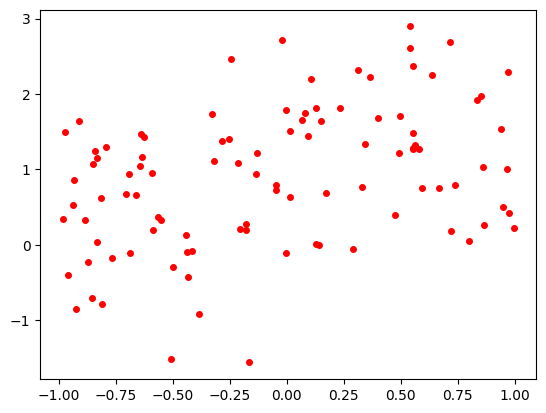

In [14]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

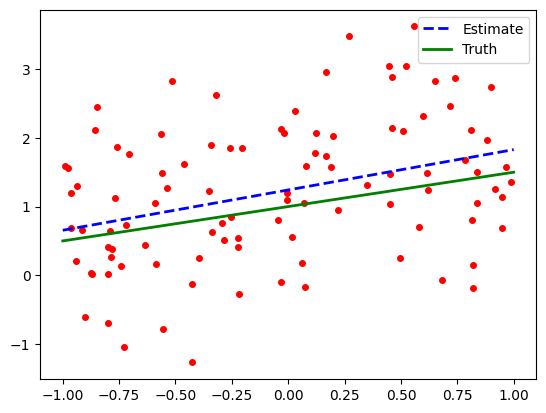

In [12]:
SAMPLE_SIZE = 100

true_beta = np.array([1, 0.5])
x = np.random.uniform(-1, 1, SAMPLE_SIZE)
eps = np.random.normal(0, 1, SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + eps

intercept = np.ones(SAMPLE_SIZE)
X = np.vstack((intercept, x)).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1, 1, 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
y_true = true_beta[0] + true_beta[1] * x_plot

plt.plot(x, y,'ro',markersize=4)
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, y_true, 'g', lw=2, label='Truth')

plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

the estimation is quite close to the true parameters:

True beta: [1.  0.5]
Estimated beta: [1.24194117 0.58671262]


d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

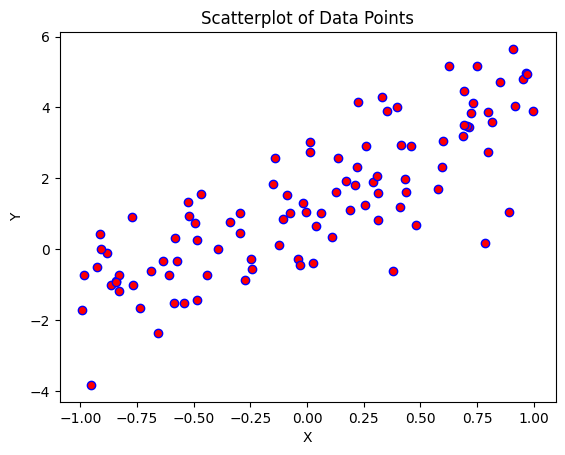

In [17]:
SAMPLE_SIZE = 100

x = np.random.uniform(-1, 1, SAMPLE_SIZE)
eps = np.random.normal(0, 1, SAMPLE_SIZE)

y = 1 + 3*x + 0.5*x**2 + eps

plt.scatter(x, y, c='r', marker='o', edgecolors='b')
plt.title("Scatterplot of Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

e) Plot the least squares estimate line through the scatter plot.

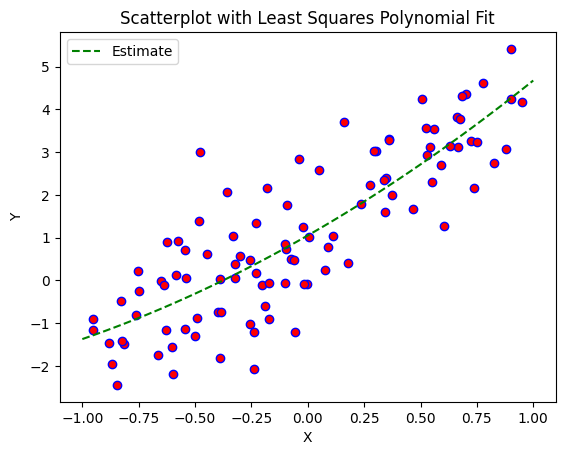

In [18]:
SAMPLE_SIZE = 100

x = np.random.uniform(-1, 1, SAMPLE_SIZE)
eps = np.random.normal(0, 1, SAMPLE_SIZE)

y = 1 + 3*x + 0.5*x**2 + eps

coeff = np.polyfit(x, y, 2)

x_plot = np.linspace(-1, 1, 100)

y_plot = coeff[0] * x_plot**2 + coeff[1] * x_plot + coeff[2]

plt.scatter(x, y, c='r', marker='o', edgecolors='b')

plt.plot(x_plot, y_plot, 'g--', label='Estimate')

plt.title("Scatterplot with Least Squares Polynomial Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

the Estimated coefficients: [0.59996758 3.02423616 1.04965799] which is close to the parameters used to generate the data 0.5, 3, 1. 

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

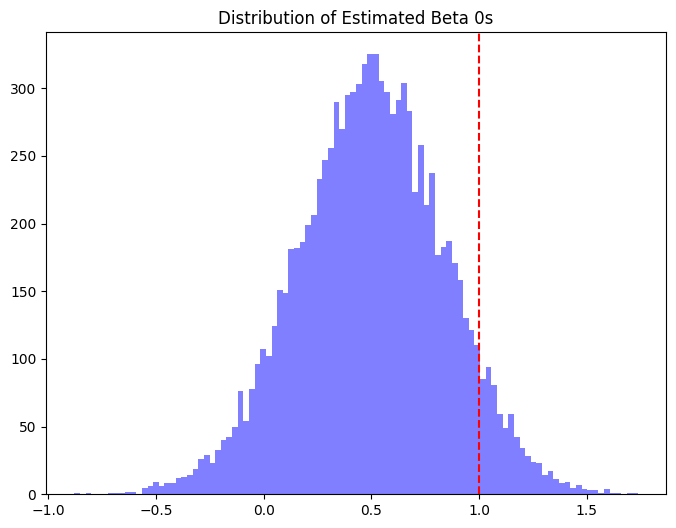

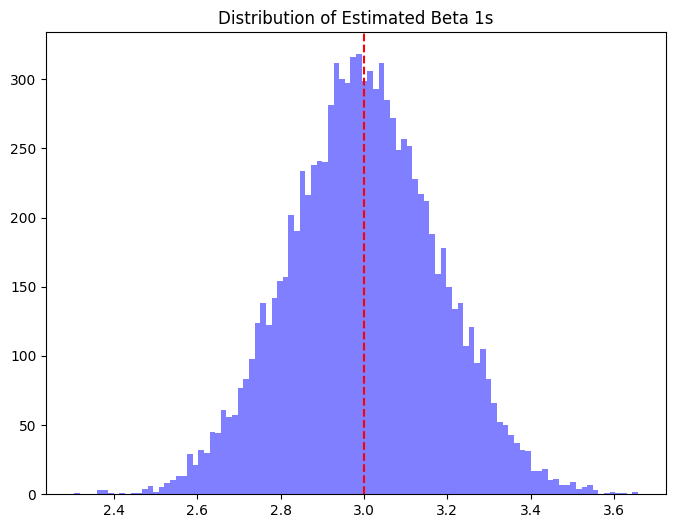

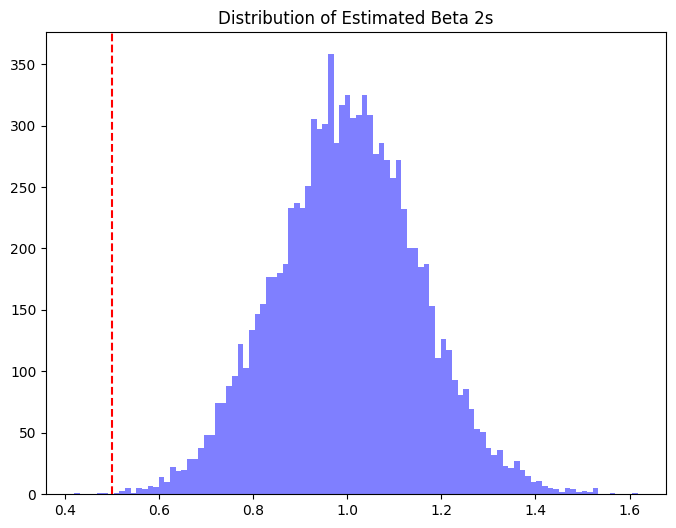

In [20]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
REPEAT_TIMES = 10000
true_beta = np.array([1.0, 3.0, .5])
est_betas = []

for _ in range(REPEAT_TIMES):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1]*x + true_beta[2]*x**2 + np.random.normal(0, 1, SAMPLE_SIZE)
    est_beta = np.polyfit(x, y, 2)
    est_betas.append(est_beta)

est_betas = np.array(est_betas)

for i in range(3):
    plt.figure(figsize=(8,6))
    plt.hist(est_betas[:, i], bins=100, alpha=0.5, color='blue')
    plt.axvline(x=true_beta[i], color='r', linestyle='dashed')
    plt.title('Distribution of Estimated Beta {}s'.format(i))
    plt.show()